# extracting a dependency graph from `importlib_metadata`

In [1]:
    
    %pip install pandas jinja2 networkx importlib_metadata pidgy toolz
    %reload_ext pidgy
    import importlib_metadata, pandas, networkx
    from toolz.curried import *    

<div hidden>

    
    %reload_ext pidgy
    import importlib_metadata, pandas, networkx
    from toolz.curried import *    

</div>

In [2]:
    @functools.lru_cache # cache this because the result will always be the same and parsing can be costly
    def get_tidy_dist() -> pandas.DataFrame:
`get_tidy_dist` creates a tidy dataframe of the required distributions in this environment
        
        return get_dists().loc["Requires-Dist"].apply(
            compose_left(pkg_resources.parse_requirements, first, vars, pandas.Series)
        )

    @functools.lru_cache # cache this because the result will always be the same and parsing can be costly
    def get_tidy_dist() -> pandas.DataFrame:
`get_tidy_dist` creates a tidy dataframe of the required distributions in this environment
        
        return get_dists().loc["Requires-Dist"].apply(
            compose_left(pkg_resources.parse_requirements, first, vars, pandas.Series)
        )

In [3]:
    def get_dists():
`get_dists` iterates through the `importlib_metadata.distributions` extracting the known metadata.
        
        return pandas.Series(
            dict((x.name, x.metadata._headers) for x in importlib_metadata.distributions())
        ).rename_axis(index=["project"]).explode().apply(
            pandas.Series, index=["key", "value"]
        ).set_index("key", append=True).reorder_levels((1, 0), 0)["value"]

    def get_dists():
`get_dists` iterates through the `importlib_metadata.distributions` extracting the known metadata.
        
        return pandas.Series(
            dict((x.name, x.metadata._headers) for x in importlib_metadata.distributions())
        ).rename_axis(index=["project"]).explode().apply(
            pandas.Series, index=["key", "value"]
        ).set_index("key", append=True).reorder_levels((1, 0), 0)["value"]

## applying the functionss

generate the `pandas.DataFrame` of the dependency graph and metadata

In [4]:
    (df := get_tidy_dist()).head().style.set_caption("the metadata associated with my known python dependecies")

,name,url,extras,specifier,marker,unsafe_name,project_name,key,specs,hashCmp,_Requirement__hash
project,,,,,,,,,,,
retrolab,jupyterlab,None,(),~=3.3.0,None,jupyterlab,jupyterlab,jupyterlab,"[('~=', '3.3.0')]","('jupyterlab', None, , frozenset(), None)",-7176474069730581504
retrolab,jupyterlab-server,None,(),~=2.3,None,jupyterlab-server,jupyterlab-server,jupyterlab-server,"[('~=', '2.3')]","('jupyterlab-server', None, , frozenset(), None)",4027949953799964160
retrolab,jupyter-server,None,(),~=1.4,None,jupyter-server,jupyter-server,jupyter-server,"[('~=', '1.4')]","('jupyter-server', None, , frozenset(), None)",-3631246956991118336
retrolab,nbclassic,None,(),~=0.2,None,nbclassic,nbclassic,nbclassic,"[('~=', '0.2')]","('nbclassic', None, , frozenset(), None)",6600834436348797952
retrolab,tornado,None,(),>=6.1.0,None,tornado,tornado,tornado,"[('>=', '6.1.0')]","('tornado', None, =6.1.0')>, frozenset(), None)",8619901927024904192


    (df := get_tidy_dist()).head().style.set_caption("the metadata associated with my known python dependecies")

cast the tidy data as a `networkx` graph

In [5]:
    G =df.reset_index().pipe(networkx.from_pandas_edgelist, source="project", target="name")

    G =df.reset_index().pipe(networkx.from_pandas_edgelist, source="project", target="name")

In [6]:
    df.name.value_counts().to_frame("count").head(20).T.style.set_caption("a table counting the frequency of specific distributions.")

,pytest,sphinx,pytest-cov,matplotlib,flake8,numpy,coverage,requests,pre-commit,typing-extensions,pandas,importlib-metadata,ipython,six,packaging,black,pyyaml,jinja2,click,ipywidgets
count,147,78,70,55,51,48,45,41,36,34,33,32,31,30,30,29,28,27,25,25


    df.name.value_counts().to_frame("count").head(20).T.style.set_caption("a table counting the frequency of specific distributions.")

draw the graph n matplotlib

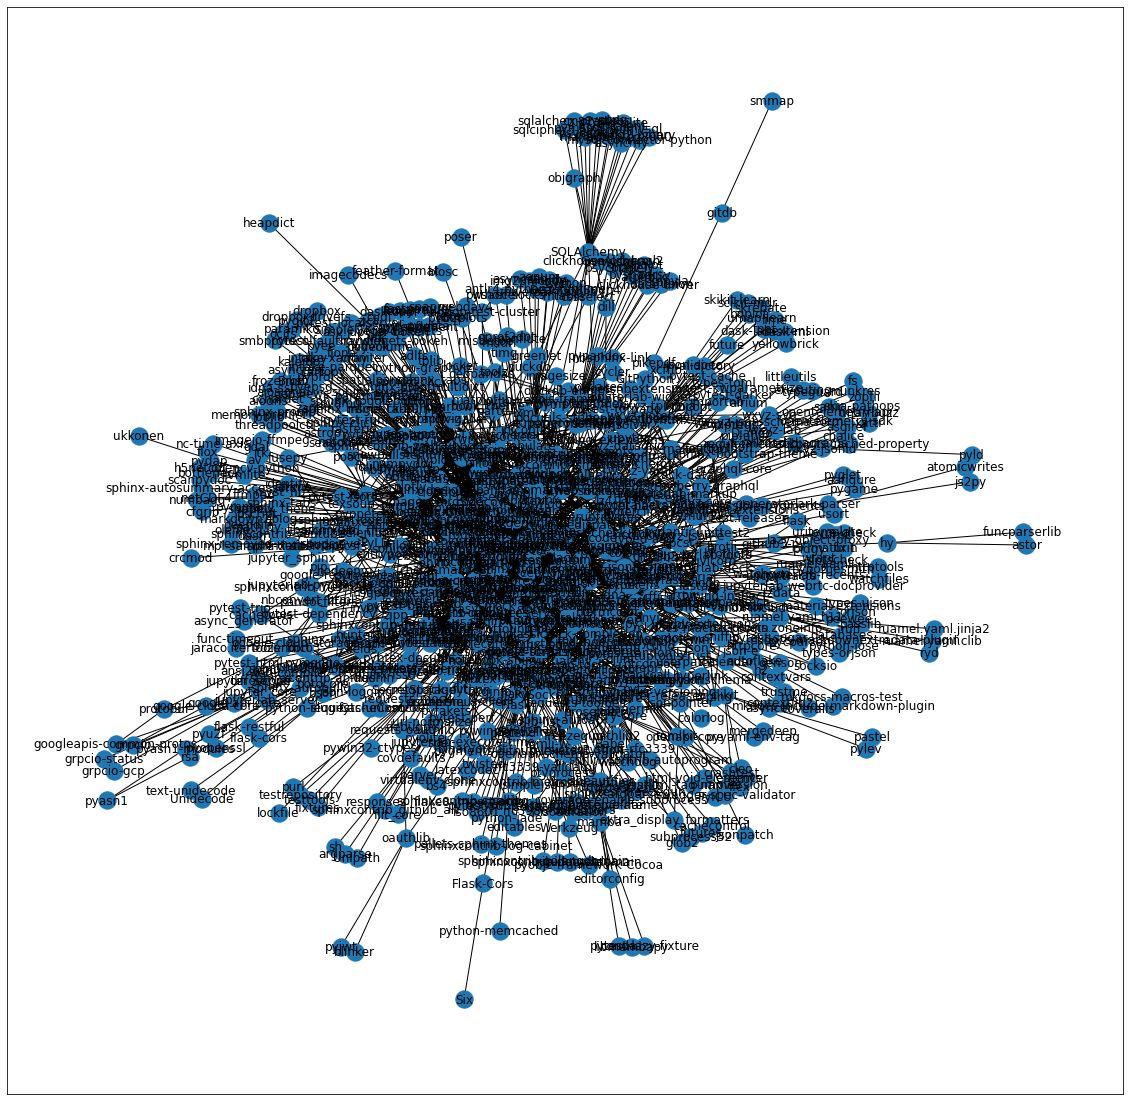

    matplotlib.pyplot.gcf().set_size_inches((20, 20))
    networkx.draw_networkx(G)

In [7]:
    matplotlib.pyplot.gcf().set_size_inches((20, 20))
    networkx.draw_networkx(G)